In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [27]:
mouse_drug = "mouse_drug.csv"
clinical_trial = "clinicaltrial_data.csv"

mouse =pd.read_csv(mouse_drug)
clinical =pd.read_csv(clinical_trial)

In [28]:
combined_df = clinical.merge(mouse,left_on='Mouse ID', right_on='Mouse ID')
combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [29]:
df_drugMean =combined_df[['Drug','Timepoint','Tumor Volume (mm3)']].groupby(['Drug','Timepoint'],as_index= False).mean()
df_drugMean


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
...,...,...,...
95,Zoniferol,25,55.432935
96,Zoniferol,30,57.713531
97,Zoniferol,35,60.089372
98,Zoniferol,40,62.916692


In [30]:
se_df=combined_df.groupby(['Drug','Timepoint']).sem()['Tumor Volume (mm3)']
se_df=se_df.to_frame()
se_df=se_df.reset_index()
se_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [31]:
#Re-formateamos el datadrame de promedios 
switch_drugmean=df_drugMean.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')
switch_drugmean.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [32]:
#Re-formateamos el datadrame de error standar
switch_se=se_df.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')
switch_se

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


No handles with labels found to put in legend.


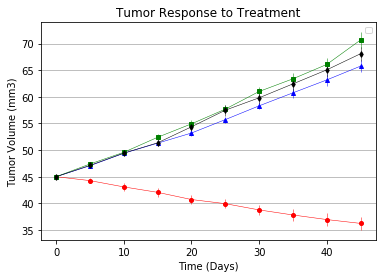

In [33]:
#Graficamos los valores del dataframe mean y el error standar
plt.errorbar(switch_drugmean.index, switch_drugmean["Capomulin"],switch_se["Capomulin"], color="r", marker="o",markersize=4,linewidth=0.50)
plt.errorbar(switch_drugmean.index, switch_drugmean["Infubinol"],switch_se["Infubinol"], color="b", marker="^",markersize=4,linewidth=0.50)
plt.errorbar(switch_drugmean.index, switch_drugmean["Ketapril"],switch_se["Ketapril"], color="g", marker="s",markersize=4,linewidth=0.50)
plt.errorbar(switch_drugmean.index, switch_drugmean["Placebo"],switch_se["Placebo"], color="k", marker="d",markersize=4,linewidth=0.50)


#Renombramos Axis,Title y agregamos un grid al eje de las 'y' tambien la legenda de las columnas elegidas.
plt.title("Tumor Response to Treatment")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Time (Days)")
plt.grid(True,axis='y')
plt.legend(loc="best", fontsize="small", fancybox=True)
plt.savefig("image1.png")
plt.show() 

In [34]:
df_metaMean =combined_df[['Drug','Timepoint','Metastatic Sites']].groupby(['Drug','Timepoint'],as_index= False).mean()
df_metaMean.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [35]:
df_seMeta=combined_df[['Drug','Timepoint','Metastatic Sites']].groupby(['Drug','Timepoint']).sem()['Metastatic Sites']
df_seMeta.to_frame()
df_seMeta=df_seMeta.reset_index()
df_seMeta.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [36]:
switch_metaMean=df_metaMean.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')
switch_metaMean.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [37]:
switch_metaSE=df_seMeta.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')
switch_metaSE.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


No handles with labels found to put in legend.


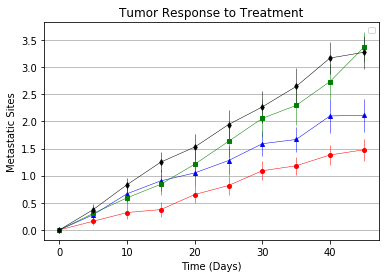

In [38]:
#Graficamos los valores del dataframe mean y el error standar
plt.errorbar(switch_metaMean.index, switch_metaMean["Capomulin"],switch_metaSE["Capomulin"], color="r", marker="o",markersize=4,linewidth=0.50)
plt.errorbar(switch_metaMean.index, switch_metaMean["Infubinol"],switch_metaSE["Infubinol"], color="b", marker="^",markersize=4,linewidth=0.50)
plt.errorbar(switch_metaMean.index, switch_metaMean["Ketapril"],switch_metaSE["Ketapril"], color="g", marker="s",markersize=4,linewidth=0.50)
plt.errorbar(switch_metaMean.index, switch_metaMean["Placebo"],switch_metaSE["Placebo"], color="k", marker="d",markersize=4,linewidth=0.50)


#Renombramos Axis,Title y agregamos un grid al eje de las 'y' tambien la legenda de las columnas elegidas.
plt.title("Tumor Response to Treatment")
plt.ylabel("Metastatic Sites")
plt.xlabel("Time (Days)")
plt.grid(True,axis='y')
plt.legend(loc="best", fontsize="small", fancybox=True)
plt.savefig("image2.png")
plt.show() 

In [39]:
# Survival Rates
df_counMis=combined_df[['Drug','Timepoint','Mouse ID']].groupby(['Drug','Timepoint'],as_index= False).count()
df_counMis.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [40]:
switch_countMis= df_counMis.pivot(index='Timepoint', columns='Drug', values='Mouse ID')
switch_countMis

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


No handles with labels found to put in legend.


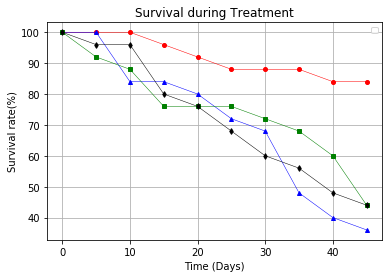

In [41]:
plt.plot(100 * switch_countMis["Capomulin"] / switch_countMis["Capomulin"].max() , marker = 'o',color='r' , markersize=4, linewidth=0.50)
plt.plot(100 * switch_countMis["Infubinol"] / switch_countMis["Infubinol"].max() , marker = '^',color='b' , markersize=4, linewidth=0.50)
plt.plot(100 * switch_countMis["Ketapril"] / switch_countMis["Ketapril"].max() , marker = 's',color='g' , markersize=4, linewidth=0.50)
plt.plot(100 * switch_countMis["Placebo"] / switch_countMis["Placebo"].max() , marker = 'd',color='k' , markersize=4, linewidth=0.50)

plt.title("Survival during Treatment")
plt.ylabel("Survival rate(%)")
plt.xlabel("Time (Days)")
plt.grid(True)
plt.legend(loc="best", fontsize="small", fancybox=True)
plt.savefig("image3.png")
plt.show() 

In [42]:
df_drug =combined_df[['Drug','Timepoint','Tumor Volume (mm3)']].groupby(['Drug','Timepoint']).mean()
df_drug=df_drug.reset_index(level=0)

In [43]:
pct_change = (df_drug.loc[45,:])
pct_change['pct_change']=((pct_change['Tumor Volume (mm3)']-45)/45)*100
pct_change=pct_change[['Drug','pct_change']]
pct_change=pct_change.reset_index()
pct_change=pct_change[['Drug','pct_change']]
pct_change

,Drug,pct_change
0,Capomulin,-19.475303
1,Ceftamin,42.516492
2,Infubinol,46.123472
3,Ketapril,57.028795
4,Naftisol,53.923347
5,Placebo,51.297960
6,Propriva,47.241175
7,Ramicane,-22.320900
8,Stelasyn,52.085134
9,Zoniferol,46.579751


In [44]:
change=pct_change.loc[[0,2,3,5],:]
good= change['pct_change']>0

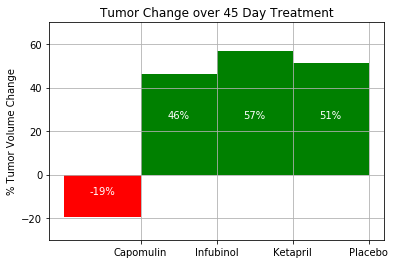

In [45]:
grafica=plt.bar(change['Drug'],change['pct_change'],width=-1,align='edge',color = good.map({True:'g',False:'r'}))
plt.grid()
plt.ylim(-30,70)
plt.ylabel('% Tumor Volume Change')
plt.title('Tumor Change over 45 Day Treatment')

def etiqueta(grafica):
    for etq in grafica:
        height = etq.get_height()
        if height > 0:
            label_position =25
        else:
            label_position = -10
        plt.text(etq.get_x() + etq.get_width()/2., label_position,
                '%d' % int(height)+'%',color='white',
                ha='center', va='bottom')

etiqueta(grafica)

